In [48]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

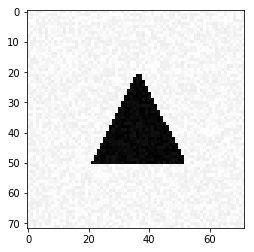

In [49]:
## mp1 functions
import matplotlib.pyplot as plt
%matplotlib inline

IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]




# Simple Classification

In [28]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [29]:
y_train = to_categorical(Y_train)

In [33]:
# build the model using stochastic gradient descent optimizer
n_cols = X_train.shape[1]
model = Sequential()
model.add(Dense(3, activation='softmax', input_shape = (n_cols,)))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.fit(X_train, y_train, nb_epoch=30, batch_size=32)

Epoch 1/30
300/300 [==============================] - 0s 625us/step - loss: 8.7990 - acc: 0.3167
Epoch 2/30
300/300 [==============================] - 0s 99us/step - loss: 8.5828 - acc: 0.3300
Epoch 3/30
300/300 [==============================] - 0s 110us/step - loss: 6.5070 - acc: 0.4700
Epoch 4/30
300/300 [==============================] - 0s 147us/step - loss: 6.1513 - acc: 0.4800
Epoch 5/30
300/300 [==============================] - 0s 147us/step - loss: 5.4746 - acc: 0.5700
Epoch 6/30
300/300 [==============================] - 0s 147us/step - loss: 5.0394 - acc: 0.6367
Epoch 7/30
300/300 [==============================] - 0s 174us/step - loss: 4.9121 - acc: 0.6433
Epoch 8/30
300/300 [==============================] - 0s 107us/step - loss: 5.1513 - acc: 0.6200
Epoch 9/30
300/300 [==============================] - 0s 134us/step - loss: 4.8047 - acc: 0.6967
Epoch 10/30
300/300 [==============================] - 0s 120us/step - loss: 4.8058 - acc: 0.6933
Epoch 11/30
300/300 [=========

In [ ]:
# the accuracy is low, and loss funtion value is high.This model is not accurate. 

In [ ]:
# Check classifiers:

In [9]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[1., 0., 0.]], dtype=float32)

In [10]:
[X_test, v] = generate_a_triangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[1., 0., 0.]], dtype=float32)

In [11]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[1., 0., 0.]], dtype=float32)

In [ ]:
# Visualisation:

In [12]:
[W1, W2] = model.get_weights()
w10 = W1[:,0]
w11 = W1[:,1]
w12 = W1[:,2]

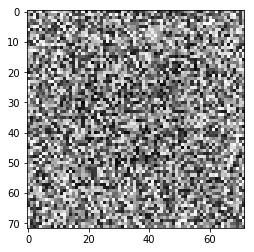

In [13]:
plt.imshow(w10.reshape(72,72), cmap='gray')

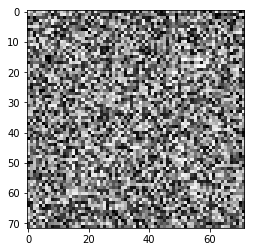

In [14]:
plt.imshow(w11.reshape(72,72), cmap='gray')

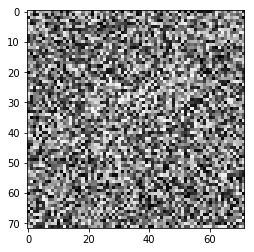

In [15]:
plt.imshow(w12.reshape(72,72), cmap='gray')

In [16]:
# the graph is not clear. This optimizer is not good enough. 

In [ ]:
# Adam Optimizer

In [36]:
# build the model
n_cols = X_train.shape[1]
model = Sequential()
model.add(Dense(3, activation='softmax', input_shape = (n_cols,)))

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.fit(X_train, y_train, nb_epoch=30, batch_size=32)

Epoch 1/30
300/300 [==============================] - 0s 952us/step - loss: 1.4241 - acc: 0.3767
Epoch 2/30
300/300 [==============================] - 0s 241us/step - loss: 0.7406 - acc: 0.6567
Epoch 3/30
300/300 [==============================] - 0s 134us/step - loss: 0.5782 - acc: 0.7067
Epoch 4/30
300/300 [==============================] - 0s 147us/step - loss: 0.4009 - acc: 0.8133
Epoch 5/30
300/300 [==============================] - 0s 134us/step - loss: 0.3281 - acc: 0.8900
Epoch 6/30
300/300 [==============================] - 0s 160us/step - loss: 0.2608 - acc: 0.9233
Epoch 7/30
300/300 [==============================] - 0s 160us/step - loss: 0.2280 - acc: 0.9533
Epoch 8/30
300/300 [==============================] - 0s 125us/step - loss: 0.1892 - acc: 0.9733
Epoch 9/30
300/300 [==============================] - 0s 137us/step - loss: 0.1647 - acc: 0.9600
Epoch 10/30
300/300 [==============================] - 0s 145us/step - loss: 0.1430 - acc: 0.9900
Epoch 11/30
300/300 [========

In [ ]:
# The value of loss function is reduced and accuracy is improved.   

In [ ]:
# Check Classifiers:

In [19]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[1., 0., 0.]], dtype=float32)

In [20]:
[X_test, v] = generate_a_triangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[1., 0., 0.]], dtype=float32)

In [21]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[1., 0., 0.]], dtype=float32)

In [ ]:
# Visualisation: 

In [39]:
[W1, W2] = model.get_weights()
w10 = W1[:,0]
w11 = W1[:,1]
w12 = W1[:,2]

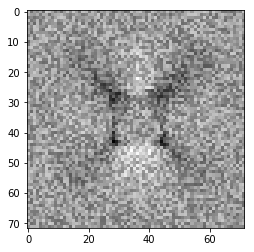

In [40]:
plt.imshow(w10.reshape(72,72), cmap='gray')

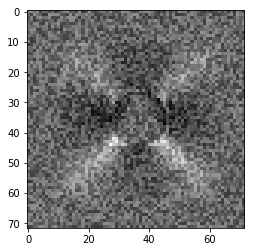

In [41]:
plt.imshow(w11.reshape(72,72), cmap='gray')

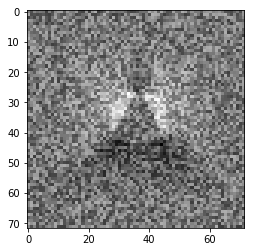

In [42]:
plt.imshow(w12.reshape(72,72), cmap='gray')

In [ ]:
# the result from visualisation is clearer. 

# A More Dicult Classication Problem:

In [74]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
from keras.utils import np_utils

In [78]:
# functions needed from mp1
def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i, end=' ')
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    return [X_test, Y_test]

In [79]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 

In [80]:
X_train = X_train.reshape(len(X_train), 72, 72, 1)
X_test = X_test.reshape(len(X_test), 72, 72, 1)
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

In [81]:
y_test.shape

(300, 3)

In [ ]:
# Build the model: 

In [82]:
model = Sequential()
model.add(Conv2D(kernel_size=(5, 5), padding="same",input_shape=(72, 72, 1),filters=16, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

In [83]:
model.add(Conv2D(32, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

In [84]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [85]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train the model

In [86]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Train on 300 samples, validate on 300 samples
Epoch 1/10
300/300 [==============================] - 6s 21ms/step - loss: 1.1463 - acc: 0.3800 - val_loss: 1.1040 - val_acc: 0.3300
Epoch 2/10
300/300 [==============================] - 4s 14ms/step - loss: 1.0461 - acc: 0.4967 - val_loss: 0.9820 - val_acc: 0.5667
Epoch 3/10
300/300 [==============================] - 4s 13ms/step - loss: 0.8367 - acc: 0.6433 - val_loss: 0.7908 - val_acc: 0.6667
Epoch 4/10
300/300 [==============================] - 3s 12ms/step - loss: 0.6461 - acc: 0.6967 - val_loss: 0.7049 - val_acc: 0.6800
Epoch 5/10
300/300 [==============================] - 3s 11ms/step - loss: 0.5022 - acc: 0.8033 - val_loss: 0.7703 - val_acc: 0.6833
Epoch 6/10
300/300 [==============================] - 3s 11ms/step - loss: 0.3698 - acc: 0.8500 - val_loss: 0.7617 - val_acc: 0.6867
Epoch 7/10
300/300 [==============================] - 3s 11ms/step - loss: 0.2887 - acc: 0.8800 - val_loss: 0.6743 - val_acc: 0.7367
Epoch 8/10
300/300 [===

In [ ]:
# accuracy is greatly improved and loss function value greatly reduced. 

In [87]:
# evaluation on the test set:
model.evaluate(X_test, y_test)

300/300 [==============================] - 1s 3ms/step


[0.8812508670488993, 0.7333333325386048]

# A Regression Problem

In [88]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import math
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [89]:
# functions needed from mp1
def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i, end=' ')
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y, z):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((72,72))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)
    
    xy = z.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'g', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)
    
    print(y, ':', z)
    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

def normal_triangle(Y):
    
    G = [(Y[0]+Y[2]+Y[4])/3.0, (Y[1]+Y[3]+Y[5])/3.0]
    
    p =[[Y[0],Y[1], math.sqrt(Y[0]**2 + Y[1]**2)],
        [Y[2],Y[3], math.sqrt(Y[2]**2 + Y[3]**2)],
        [Y[4],Y[5], math.sqrt(Y[4]**2 + Y[5]**2)]]
    
    p.sort(key=lambda x:x[2])
        
    y = np.array([p[0][0], p[0][1], p[1][0], p[1][1], p[2][0], p[2][1]])
    return y

In [90]:
[X_train, Y_train] = generate_dataset_regression(300, 20)
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 

In [91]:
nb_train = len(X_train)
nb_test = len(X_test)
y_train = np.zeros([nb_train, 6])
y_test = np.zeros([nb_test, 6])
for i in range(nb_train):
    y_train[i] = normal_triangle(Y_train[i])
for i in range(nb_test):
    y_test[i] = normal_triangle(Y_test[i])
    
x_train = X_train.reshape(len(X_train), 72, 72, 1)
x_test = X_test.reshape(len(X_test), 72, 72, 1)

In [92]:
# Build the model:
model = Sequential()
model.add(Conv2D(filters=32, activation="relu", input_shape=(72, 72, 1), kernel_size=(3, 3), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))    
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6))

In [93]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=6, batch_size=32, validation_data=(x_test, y_test))

Train on 300 samples, validate on 300 samples
Epoch 1/6
300/300 [==============================] - 5s 16ms/step - loss: 0.1327 - acc: 0.3400 - val_loss: 0.0664 - val_acc: 0.6333
Epoch 2/6
300/300 [==============================] - 3s 10ms/step - loss: 0.0573 - acc: 0.5867 - val_loss: 0.0529 - val_acc: 0.5900
Epoch 3/6
300/300 [==============================] - 3s 10ms/step - loss: 0.0427 - acc: 0.6500 - val_loss: 0.0418 - val_acc: 0.6200
Epoch 4/6
300/300 [==============================] - 3s 10ms/step - loss: 0.0331 - acc: 0.6900 - val_loss: 0.0388 - val_acc: 0.6100
Epoch 5/6
300/300 [==============================] - 3s 10ms/step - loss: 0.0273 - acc: 0.6667 - val_loss: 0.0372 - val_acc: 0.5700
Epoch 6/6
300/300 [==============================] - 4s 13ms/step - loss: 0.0220 - acc: 0.7067 - val_loss: 0.0344 - val_acc: 0.6433


In [ ]:
# Visualisation

In [94]:
import random
Y_pred = model.predict(x_test, batch_size=32)
list = range(300) 
slice = random.sample(list, 12)

[0.6349439  0.1328474  0.5658322  0.53280497 0.81407    0.72597504] : [0.51714663 0.08515156 0.69565249 0.19351947 0.69446055 0.92054337]


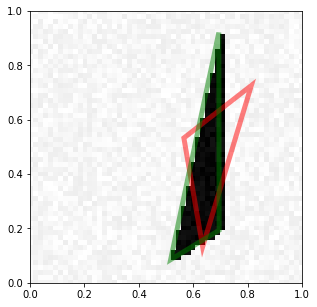

[0.33367467 0.23812905 0.10485201 0.63128144 0.4598164  0.70726216] : [0.00476487 0.81660452 0.47959375 0.47938462 0.45986567 0.11729834]


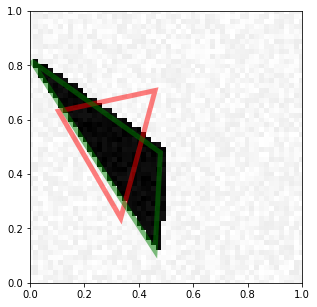

[0.44415975 0.2470471  0.5784435  0.3773287  1.0162119  0.14544164] : [0.43096676 0.06776246 0.45925474 0.5929216  0.95436341 0.14100842]


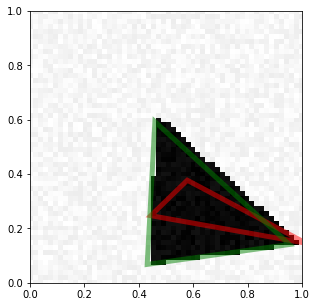

[0.3134164  0.24049117 0.2009314  0.611599   0.5117248  0.7913671 ] : [0.23325432 0.15415605 0.5149824  0.45317341 0.32182751 0.87390724]


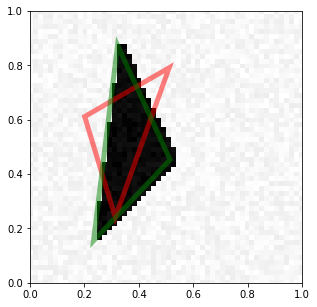

[0.05786613 0.17732483 0.18321843 0.49260244 0.4329488  0.731999  ] : [0.04215355 0.15625939 0.40017661 0.7570403  0.02674177 0.21382949]


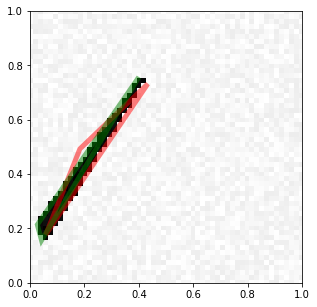

[0.6329746  0.43972796 0.6637522  0.33924794 0.6870685  0.5350581 ] : [0.75274227 0.71831399 0.71395037 0.38434768 0.74754964 0.06648072]


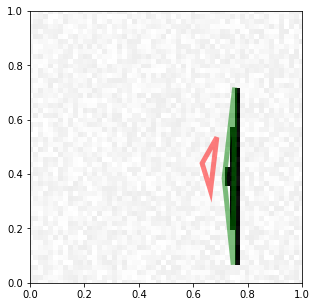

[0.69955355 0.31129602 0.8176937  0.41515604 0.82425016 0.66953003] : [0.8808634  0.58024757 0.58023455 0.28695406 0.9288465  0.51011579]


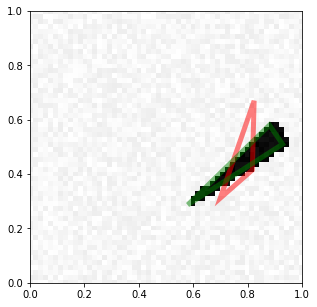

[0.45348516 0.5615611  0.45045373 0.573017   0.4990067  0.85811234] : [0.37436498 0.80601878 0.53752479 0.4952376  0.38379868 0.90312727]


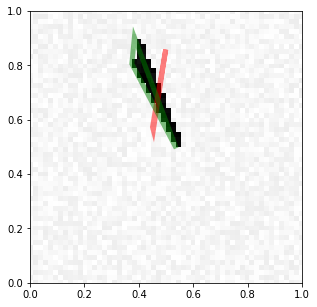

[0.35147482 0.32417494 0.37792078 0.37988424 0.5264833  0.551697  ] : [0.62208022 0.14731968 0.25730081 0.48896147 0.18250246 0.57415514]


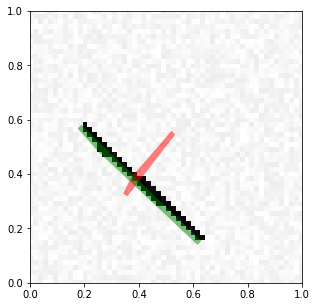

[0.4123946  0.6163211  0.5007541  0.67286724 0.8426443  0.84518355] : [0.1991782  0.66988167 0.80431848 0.51291267 0.7667545  0.79964862]


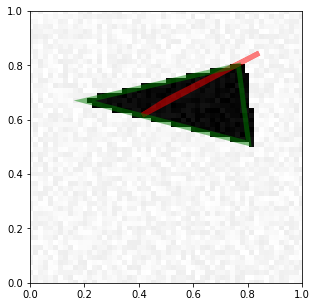

[0.19964303 0.11956044 0.04998575 0.5426443  0.42842495 0.61241955] : [0.02978994 0.76471819 0.18268838 0.11404042 0.36227032 0.29758231]


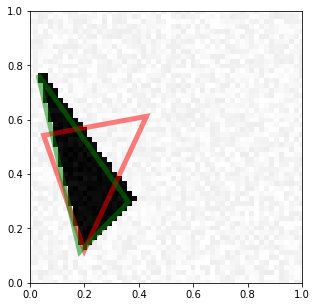

[0.13710646 0.45453176 0.47104838 0.4377618  0.5993241  0.83708054] : [4.61057026e-01 9.45763194e-01 8.42525890e-01 3.05175382e-01
 8.85420649e-04 4.17869360e-01]


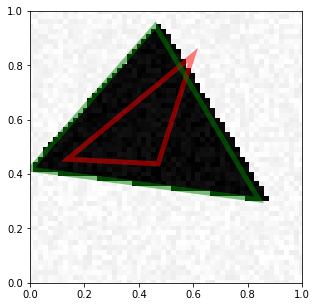

In [95]:
for i in slice:
     visualize_prediction(X_test[i], Y_pred[i], Y_test[i])

# Image Denoising

In [2]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Activation
from keras.models import Model
import random
import warnings
warnings.filterwarnings('ignore')

C:\Users\admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    x = generate_a_drawing(figsize, U, V, noise)
    y = generate_a_drawing(figsize, U, V, 0)
    return [x, y]

def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    x = generate_a_drawing(figsize, U, V, noise)
    y = generate_a_drawing(figsize, U, V, 0)
    return [x, y]

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    x = generate_a_drawing(figsize, U, V, noise)
    y = generate_a_drawing(figsize, U, V, 0)
    return [x, y]

# Make some changes to remove the noise

def generate_dataset_denoising(nb_samples, free_location=False):
    # Getting im_size:
    im1, im2 = generate_a_rectangle()
    im_size = im1.shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i, end=' ')
        category = np.random.randint(3)
        noise=np.random.randint(100)
        if category == 0:
            [X[i], Y[i]] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            [X[i], Y[i]] = generate_a_disk(noise, free_location)
        else:
            [X[i], Y[i]] = generate_a_triangle(noise, free_location)
    X = X / 255.0
    Y = Y / 255.0
    return [X, Y]

def generate_test_set_denoising():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_denoising(300, True)
    return [X_test, Y_test]

In [4]:
[X_train_noise, X_train_clean] = generate_dataset_denoising(300, True)
[X_test_noise, X_test_clean] = generate_test_set_denoising()

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 

In [5]:
x_train_clean = X_train_clean.reshape(len(X_train_clean), 72, 72, 1)
x_train_noise = X_train_noise.reshape(len(X_train_noise), 72, 72, 1)
x_test_clean = X_test_clean.reshape(len(X_test_clean), 72, 72, 1)
x_test_noise = X_test_noise.reshape(len(X_test_noise), 72, 72, 1)
input_img = Input(shape=(72, 72, 1))

In [6]:
# Build and compile model
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [7]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [8]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
autoencoder.fit(x_train_noise, x_train_clean, epochs=10, batch_size=32, shuffle=True, validation_data=(x_test_noise, x_test_clean))

Train on 300 samples, validate on 300 samples
Epoch 1/10
300/300 [==============================] - 9s 29ms/step - loss: 0.5149 - acc: 0.8219 - val_loss: 0.2194 - val_acc: 0.9156
Epoch 2/10
300/300 [==============================] - 7s 25ms/step - loss: 0.2141 - acc: 0.9155 - val_loss: 0.1462 - val_acc: 0.9566
Epoch 3/10
300/300 [==============================] - 8s 25ms/step - loss: 0.1041 - acc: 0.9667 - val_loss: 0.0496 - val_acc: 0.9852
Epoch 4/10
300/300 [==============================] - 7s 24ms/step - loss: 0.0375 - acc: 0.9878 - val_loss: 0.0281 - val_acc: 0.9902
Epoch 5/10
300/300 [==============================] - 7s 25ms/step - loss: 0.0276 - acc: 0.9903 - val_loss: 0.0258 - val_acc: 0.9912
Epoch 6/10
300/300 [==============================] - 7s 24ms/step - loss: 0.0250 - acc: 0.9914 - val_loss: 0.0240 - val_acc: 0.9913
Epoch 7/10
300/300 [==============================] - 7s 24ms/step - loss: 0.0218 - acc: 0.9923 - val_loss: 0.0220 - val_acc: 0.9921
Epoch 8/10
300/300 [===

In [10]:
x_pred_clean = autoencoder.predict(x_test_noise, batch_size=32)

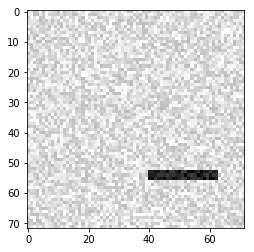

In [17]:
plt.imshow(x_test_noise[0].reshape(72,72), cmap='gray')

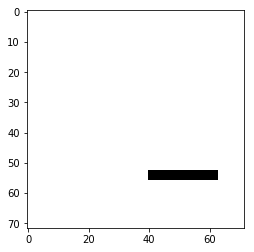

In [18]:
plt.imshow(x_test_clean[0].reshape(72,72), cmap='gray')

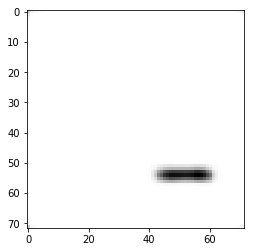

In [19]:
plt.imshow(x_pred_clean[0].reshape(72,72), cmap='gray')